# ポートフォリオ最適化
リターンを確保しつつリスクを最小にするポートフォリオを構成するにはどの銘柄をどれだけ持てばいいだろうか？

ポートフォリオに銘柄$i, (i = 1, \dots, N)$をどれだけの割合もつかということを$\boldsymbol{x} = [ x_1, \dots, x_N ]^{T}$、各銘柄のリターンの共分散行列を$C$とすると、ポートフォリオ全体の分散は$\boldsymbol{x}^{T}C\boldsymbol{x}$となる。各銘柄の期待リターンを$\boldsymbol{m} = [ m_1, \dots, m_N ]^{T}$とすると、ポートフォリオ全体のリターンは$\sum_{i=1}^{N}{m_i x_i}$である。ポートフォリオの分散を最小化しつつリターン$r$以上を求めるには、以下の条件で最適化を解くことになる。この最適化は非線形最適化のうち二次計画法で解ける形である。（$C$は共分散行列のため正定）

\begin{aligned}
& \text{minimize } && \boldsymbol{x}^{T}C\boldsymbol{x} \\
& \text{subject to} && \sum_{i=1}^{N}{x_i} = 1 \\
& && \sum_{i=1}^{N}{m_i x_i} \geq r \\
& && 0 \leq x_i \leq 1 &&& (i = 1, \dots, N)
\end{aligned}

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import quandl

%matplotlib inline

/Users/air_bell/.pyenv/versions/3.6.10/envs/py3.6.10/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
quandl.ApiConfig.api_key = "CHucYetKUSPA4m7ndT4z"

In [3]:
start = datetime(2010, 1, 1)
end = datetime(2018, 12, 31)
symbls = [ # DOW 30種
"AAPL",
"AXP",
"BA",
"CAT",
"CSCO",
"CVX",
"DIS",
"DOW",
"GS",
"HD",
"IBM",
"INTC",
"JNJ",
"JPM",
"KO",
"MCD",
"MMM",
"MRK",
"MSFT",
"NKE",
"PFE",
"PG",
"TRV",
"UNH",
"UTX",
"V",
"VZ",
"WBA",
"WMT",
"XOM"
]

# Quadlで株価取得
codes = ['WIKI/' + symbl for symbl in symbls]
data = quandl.get(codes, start_date=start, end_date=end)
types = [code + " - Adj. Close" for code in codes]
df = data[types]
df.columns = symbls
df_return = df.pct_change().dropna() # 収益率
N = len(df.columns) # 銘柄数

# disp
print(f"Number of data\t: {df.shape[0]}")
print("Number of stocks:")
print(N)

Number of data	: 2071
Number of stocks:
30


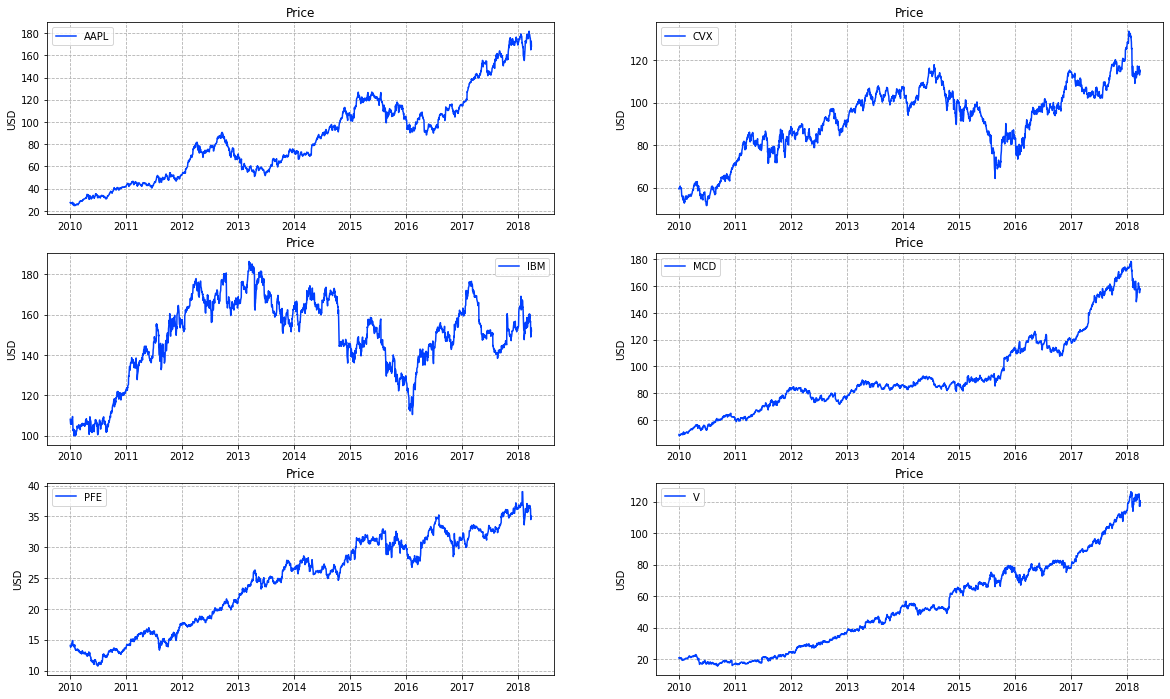

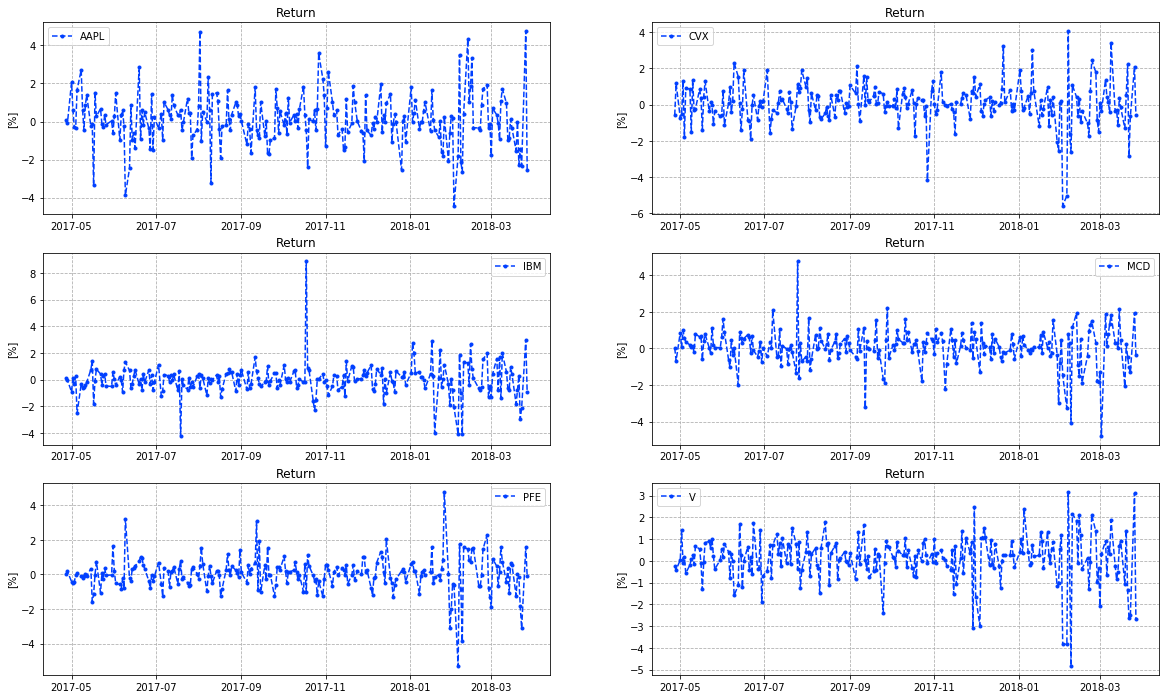

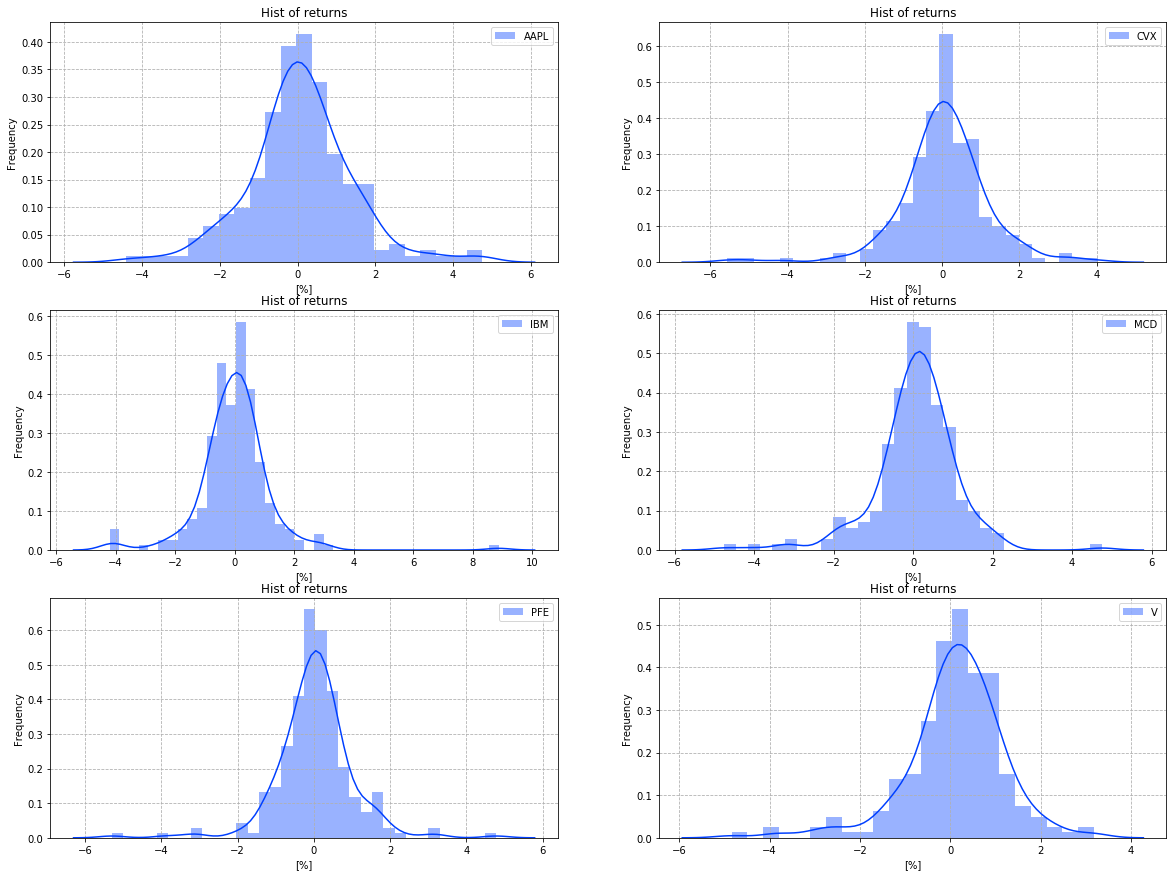

In [4]:
num_plot = 6 # 適当な数とってきてplotしてみる
num_rows =num_plot / 2
num_skip = int(len(df.columns)/(num_rows*2))

plt.style.use('seaborn-bright')
plt.figure(figsize=(20,12))
for i, s in enumerate(df.columns[::num_skip]):
    plt.subplot(num_rows, 2, i+1)
    plt.plot(df[s], label=s)
    plt.title("Price")
    plt.ylabel("USD")
    plt.grid(linestyle="--")
    plt.legend()

plt.style.use('seaborn-bright')
plt.figure(figsize=(20,12))
for i, s in enumerate(df.columns[::num_skip]):
    plt.subplot(num_rows, 2, i+1)
    plt.plot(df_return[s]*100,"--.", label=s)
    plt.title("Return")
    plt.ylabel("[%]")
    plt.grid(linestyle="--")
    plt.legend()
    
plt.style.use('seaborn-bright')
plt.figure(figsize=(20,15))
for i, s in enumerate(df.columns[::num_skip]):
    plt.subplot(num_rows, 2, i+1)
    sns.distplot(df_return[s]*100, label=s)
    plt.title("Hist of returns")
    plt.xlabel("[%]")
    plt.ylabel("Frequency")
    plt.grid(linestyle="--")
    plt.legend()
    

目的関数と制約条件をCVXOPTに読み込ませるため、多少の式変形を行う。CVXOPTが想定する2次計画問題は以下の形となる。
\begin{aligned}
& \text{minimize } && \frac{1}{2}\boldsymbol{x}^{T}P\boldsymbol{x} + \boldsymbol{q} \boldsymbol{x}\\
& \text{subject to} && G\boldsymbol{x} \leq \boldsymbol{h} \\
& && A\boldsymbol{x} = \boldsymbol{b}
\end{aligned}


STD of everyday returns
AAPL	: 0.0134
AXP	: 0.0108
BA	: 0.0153
CAT	: 0.0144
CSCO	: 0.0131
CVX	: 0.0115
DIS	: 0.0119
DOW	: 0.0065
GS	: 0.0140
HD	: 0.0114
IBM	: 0.0120
INTC	: 0.0163
JNJ	: 0.0102
JPM	: 0.0116
KO	: 0.0073
MCD	: 0.0103
MMM	: 0.0076
MRK	: 0.0113
MSFT	: 0.0134
NKE	: 0.0150
PFE	: 0.0100
PG	: 0.0081
TRV	: 0.0109
UNH	: 0.0117
UTX	: 0.0114
V	: 0.0109
VZ	: 0.0120
WBA	: 0.0144
WMT	: 0.0146
XOM	: 0.0094

Expected returns after 252 days
AAPL	: 0.2052
AXP	: 0.1623
BA	: 0.6747
CAT	: 0.4128
CSCO	: 0.3100
CVX	: 0.1242
DIS	: -0.1395
DOW	: 0.0597
GS	: 0.1298
HD	: 0.1658
IBM	: -0.0063
INTC	: 0.4198
JNJ	: 0.0662
JPM	: 0.2500
KO	: 0.0155
MCD	: 0.1489
MMM	: 0.2274
MRK	: -0.1367
MSFT	: 0.3434
NKE	: 0.2347
PFE	: 0.0806
PG	: -0.1069
TRV	: 0.1531
UNH	: 0.2706
UTX	: 0.0928
V	: 0.2880
VZ	: 0.0169
WBA	: -0.2531
WMT	: 0.1851
XOM	: -0.0768



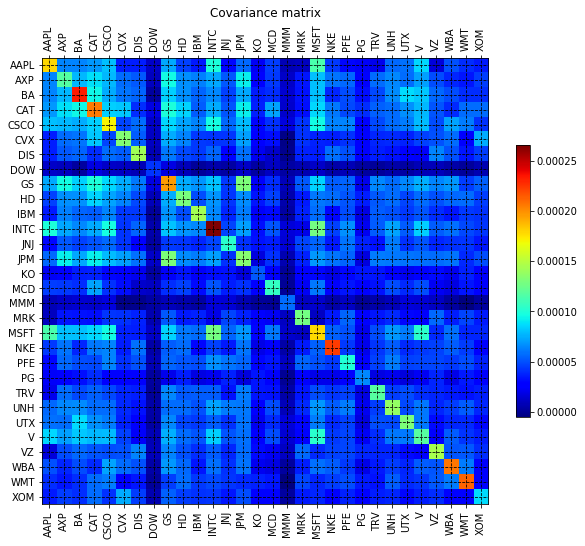

In [5]:
# 期待（？）収益率 = 全区間の収益率の平均値に任意の期間を掛けたもの
duration = 252 # [days]
m = df_return.mean().values * duration

# 日々の収益率の共分散行列
cov = df_return.cov().values # TODO: これで正しい？ * duration?

# 最適化するPFの収益率の最小値
r = 0.15 

# 最適化ソルバへの入力を準備
g1 = np.eye(N)
g2 = -np.eye(N)
G = np.vstack((g1, g2))
G = np.vstack((G, -m))

# h = [1,1,...1, 0,0,...,0,-r]
h1 = np.ones(N)
h2 = np.zeros(N)
h = np.hstack((h1, h2))
h = np.hstack((h, -r))

# disp
print("STD of everyday returns")
for s, v in zip(df.columns, np.diag(cov)):
    print(f"{s}\t: {np.sqrt(v):.4f}")
print("")

print(f"Expected returns after {duration} days")
for s, _m in zip(df.columns, m):
    print(f"{s}\t: {_m:.4f}")
print("")

# 共分散行列
plt.figure(figsize=(10,10))
plt.title("Covariance matrix")
plt.imshow(cov, cmap="jet")
plt.colorbar(shrink=0.5)
plt.gca().tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
plt.xticks(np.arange(0, 30, 1), rotation=90)
plt.gca().set_xticklabels(df.columns)
plt.yticks(np.arange(0, 30, 1))
plt.gca().set_yticklabels(df.columns)
plt.grid(which='major',color='black',linestyle='--')

    
# Optimization    
# print("G:")
# print(G)
# print("h")
# print(h)

In [6]:
import numpy as np
import cvxopt
from cvxopt import matrix
cvxopt.solvers.options['show_progress'] = False

P=matrix(cov)
q=matrix(np.zeros(N))
A=matrix(np.ones(N).reshape(1,N))
b=matrix(1.0)
G=matrix(G)
h=matrix(h)

sol=cvxopt.solvers.qp(P,q, A=A, b=b,G=G, h=h)
# print(sol)
print("")

print("Optimized Portfolio")
for i, e in enumerate(sol["x"]):
    if e > 10e-3:
        print(f"{df_return.columns[i]}\t: {e:.4f}[%]")

risk_e = 2 * sol["primal objective"]
x_e = np.array(list(sol["x"]))
r_e = m.dot(x_e)

print("-------------------")
print(f"PF variance \t: {risk_e:.8f}")
print(f"PF std \t\t: {np.sqrt(risk_e):.8f}")
print(f"PF return \t: {r_e:.8f}")


Optimized Portfolio
BA	: 0.0446[%]
CVX	: 0.0235[%]
DOW	: 0.3237[%]
KO	: 0.1150[%]
MCD	: 0.0410[%]
MMM	: 0.3072[%]
NKE	: 0.0294[%]
PG	: 0.0270[%]
TRV	: 0.0379[%]
WMT	: 0.0369[%]
-------------------
PF variance 	: 0.00001859
PF std 		: 0.00431213
PF return 	: 0.15000158


## 効率的フロンティア

In [7]:
max_return = df_return.mean().max()*duration
min_return = df_return.mean().min()*duration
r_list = []
std_list = []
for _r in np.arange(min_return, max_return, 0.05):
    h1 = np.ones(N)
    h2 = np.zeros(N)
    h = np.hstack((h1, h2))
    h = np.hstack((h, -_r))
    h=matrix(h)
    try:
        sol=cvxopt.solvers.qp(P,q, A=A, b=b,G=G, h=h)
    except:
        break
    std = np.sqrt(2 * sol["primal objective"])
    std_list.append(std)
    r_list.append(_r)

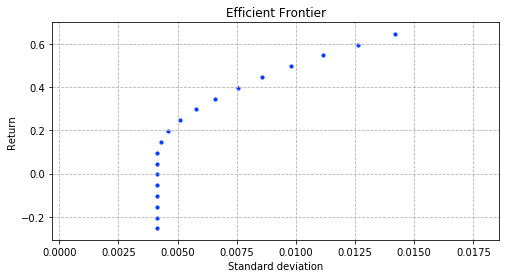

In [8]:
plt.style.use('seaborn-bright')
plt.figure(figsize=(8,4))
plt.scatter(std_list, r_list, s=10)
plt.title("Efficient Frontier")
plt.xlabel("Standard deviation")
plt.ylabel("Return")
plt.grid(linestyle="--")